# 📌 Project Title: Titanic Dataset - Exploratory Data Analysis (EDA)


# Comprehensive Exploratory Data Analysis (EDA) of the Titanic Dataset

## Project Overview

This Google Colab notebook outlines a structured approach to Exploratory Data Analysis (EDA), a critical initial phase in any data science project. The primary objective of EDA is to gain a deep understanding of the dataset's characteristics, identify patterns, detect anomalies, and uncover relationships among variables through a combination of statistical methods and data visualization.

**Key Objectives of this EDA:**
* To summarize the main characteristics of the data.
* To discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.
* To prepare the foundation for subsequent data preprocessing and predictive modeling tasks.

**Tools Utilized:**
* **Pandas:** For robust data manipulation and analysis.
* **Matplotlib & Seaborn:** For static, high-quality statistical data visualization.
* **Plotly Express:** For interactive and dynamic data visualizations.

**Dataset:**
For this demonstration, we will leverage the renowned **Titanic Dataset**, which is widely used for introductory data science exercises and provides a rich set of features to explore.

## Section 1: Environment Setup and Data Ingestion

This section focuses on preparing our Python environment by importing essential libraries and subsequently loading the dataset into a Pandas DataFrame. Robust data ingestion is the foundational step, ensuring that the data is correctly loaded and readily accessible for analysis.

Cell 1: Setup and Library Imports
This cell imports all the necessary Python libraries for data manipulation, visualization, and machine learning preprocessing.

In [1]:
# @title Setup and Library Imports
# Import core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure plotting styles for professional aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Standardize figure size
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Define the URL for the Titanic Dataset
titanic_dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

print(f"Attempting to download and load the dataset from: {titanic_dataset_url}\n")

try:
    # Load the dataset into a Pandas DataFrame
    df = pd.read_csv(titanic_dataset_url)
    print("Dataset loaded successfully!")

    # Display basic information about the dataset
    print(f"\nDataset shape: {df.shape} (Rows, Columns)")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataFrame Information (Data Types and Non-Null Counts):")
    df.info()

except Exception as e:
    print(f"Error encountered during dataset download or loading: {e}")
    print("Please verify the URL or ensure network connectivity. Loading a dummy DataFrame for demonstration purposes.")
    # Fallback to a dummy DataFrame if the actual dataset download fails
    data = {
        'PassengerId': range(1, 11),
        'Survived': [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
        'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 3, 2],
        'Name': [f'Passenger {i}' for i in range(1, 11)],
        'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female'],
        'Age': [22.0, 38.0, 26.0, 35.0, 35.0, np.nan, 54.0, 2.0, 27.0, 14.0],
        'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1],
        'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0],
        'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347082', '237736'],
        'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 8.46, 51.86, 21.07, 11.13, 30.07],
        'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan, np.nan, 'E46', np.nan, np.nan, np.nan],
        'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C']
    }
    df = pd.DataFrame(data)
    print("\nDummy DataFrame loaded for demonstration:")
    print(df.head())
    print("\nDummy DataFrame Information:")
    df.info()

Attempting to download and load the dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

Dataset loaded successfully!

Dataset shape: (891, 12) (Rows, Columns)

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500  

## Section 2: Core Exploratory Data Analysis (EDA)

This section implements the core steps of EDA as outlined in the mini-guide, combining theoretical insights with practical code execution.

### Hint 1: Generating Descriptive Statistics for Numeric Features

**Theoretical Foundation:**
Descriptive statistics offer a foundational quantitative summary of a dataset's numerical features. They provide immediate insights into the central tendency, dispersion, and shape of each variable's distribution. Key metrics include:
* **Count:** The number of non-null observations, indicating data completeness.
* **Mean:** The arithmetic average, providing a measure of central tendency.
* **Standard Deviation (std):** Quantifies the spread or variability of data points around the mean.
* **Min/Max:** The smallest and largest values, defining the data's range.
* **25th, 50th (Median), 75th Percentiles:** These quartiles delineate the distribution, offering insights into skewness and the spread of the middle 50% of the data (Interquartile Range - IQR).

This initial statistical overview helps in quickly identifying potential issues like extreme values or data inconsistencies.

In [2]:
print("### 1. Generating Descriptive Statistics for Numeric Features ###\n")

# Use the .describe() method to generate a comprehensive summary of numeric columns
# The 'include=' parameter can be used to specify data types, or it defaults to numeric
print(df.describe())

print("\n**Interpretation:** This table provides an initial quantitative overview. For instance, observe the 'Age' column's mean and std to gauge typical age and its variability. The 'Fare' column's max value might indicate significant outliers compared to its mean and median.")

### 1. Generating Descriptive Statistics for Numeric Features ###

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

**Interpretat

### Hint 2: Visualizing Distributions with Histograms and Boxplots

**Theoretical Foundation:**
While descriptive statistics provide numerical summaries, visualizations are indispensable for understanding the underlying shape and characteristics of data distributions.

* **Histograms:**
    * **Purpose:** To graphically represent the frequency distribution of a continuous numerical variable. Data is divided into "bins," and the height of each bar represents the count of observations falling into that bin.
    * **Insights:** Effective for revealing the distribution's shape (e.g., normal, skewed, uniform, bimodal), identifying peaks (modes), and assessing spread.

* **Boxplots (Box-and-Whisker Plots):**
    * **Purpose:** To concisely display the distribution of numerical data and identify potential outliers based on quartiles. The box spans the interquartile range (IQR), with a line marking the median. Whiskers extend to the data's range, excluding outliers.
    * **Insights:** Excellent for detecting skewness, visualizing the spread (IQR), and clearly pinpointing outliers that lie beyond the whiskers. They are also highly effective for comparing distributions across different categories.


### 2. Visualizing Distributions with Histograms and Boxplots ###


--- Visualizing Distribution for: 'Survived' ---



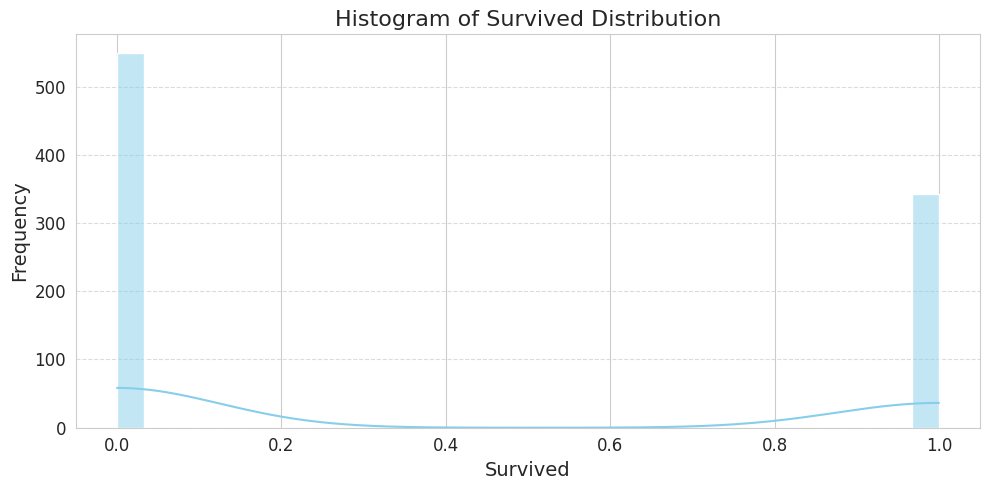

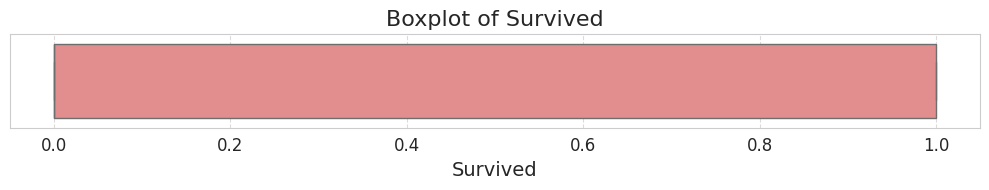

**Observation for 'Survived':**
- The distribution appears relatively symmetric.
- No significant outliers detected by the boxplot (using 1.5*IQR rule).



--- Visualizing Distribution for: 'Pclass' ---



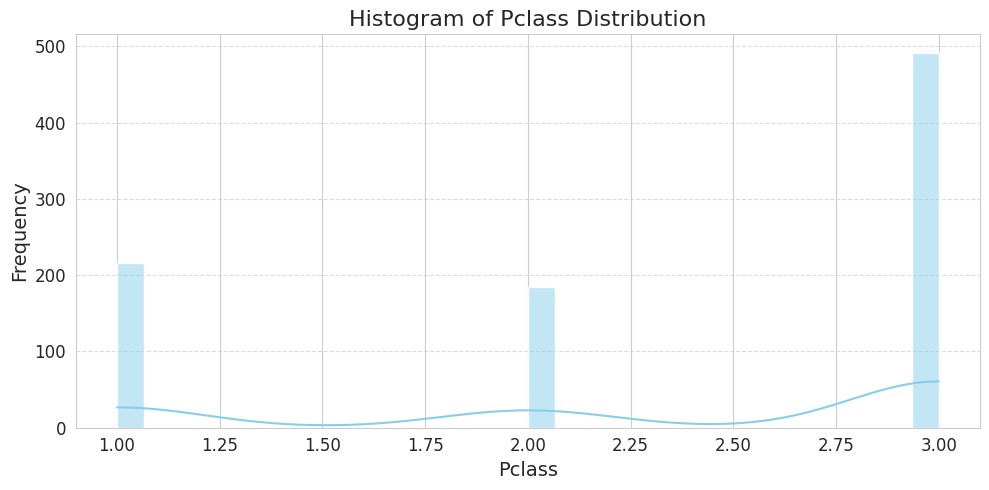

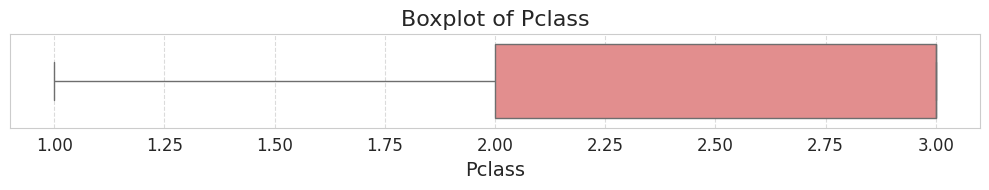

**Observation for 'Pclass':**
- The distribution is negatively skewed (left-skewed).
- No significant outliers detected by the boxplot (using 1.5*IQR rule).



--- Visualizing Distribution for: 'Age' ---



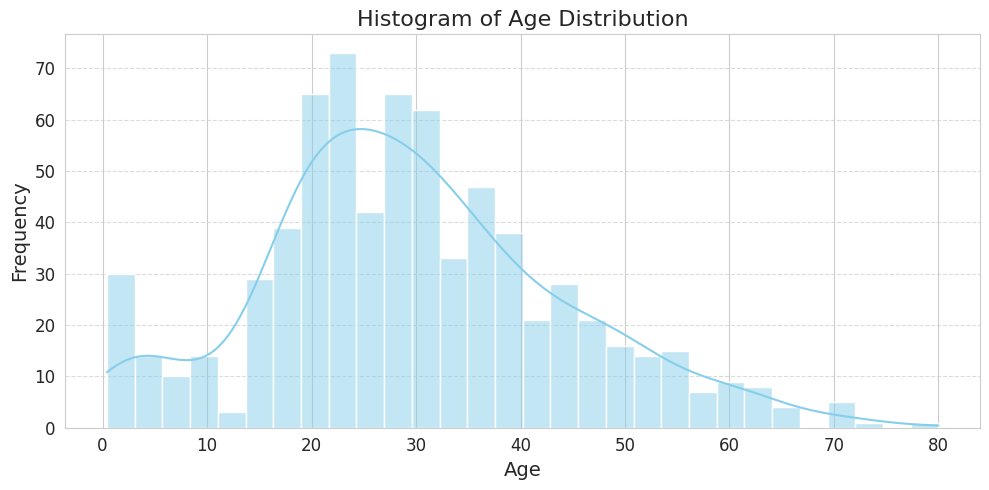

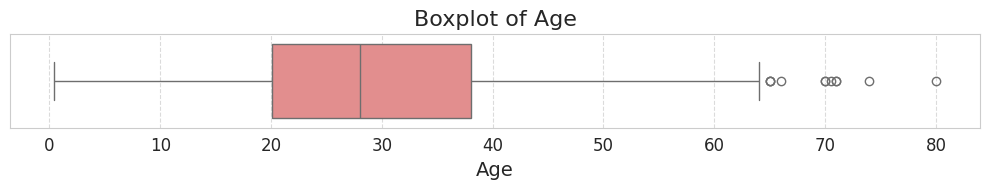

**Observation for 'Age':**
- The distribution appears relatively symmetric.
- The boxplot indicates the presence of 11 potential outliers.



--- Visualizing Distribution for: 'SibSp' ---



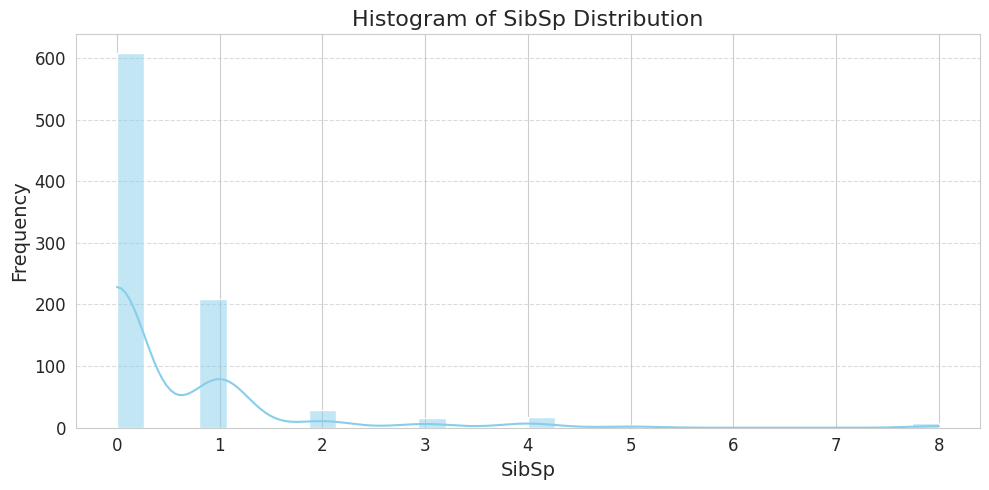

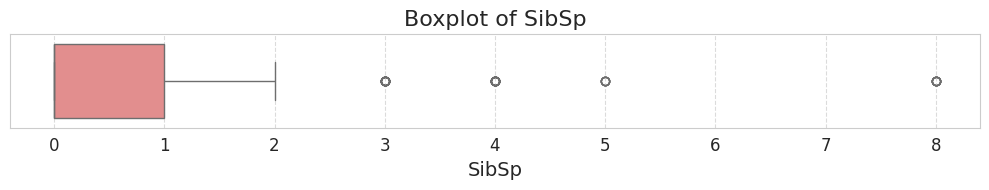

**Observation for 'SibSp':**
- The distribution is positively skewed (right-skewed).
- The boxplot indicates the presence of 46 potential outliers.



--- Visualizing Distribution for: 'Parch' ---



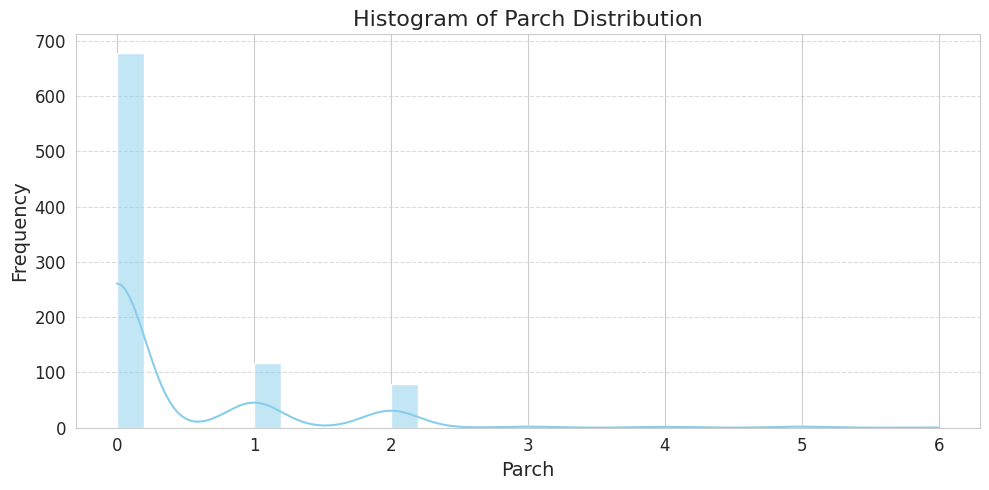

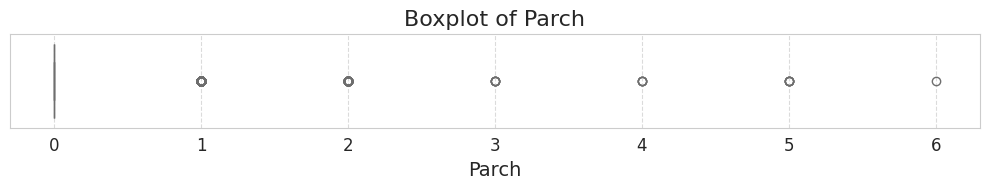

**Observation for 'Parch':**
- The distribution is positively skewed (right-skewed).
- The boxplot indicates the presence of 213 potential outliers.



--- Visualizing Distribution for: 'Fare' ---



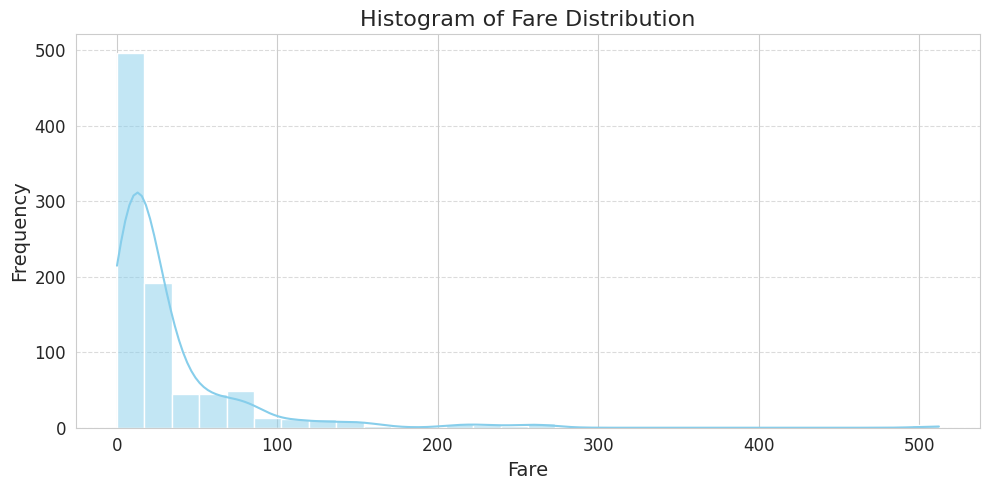

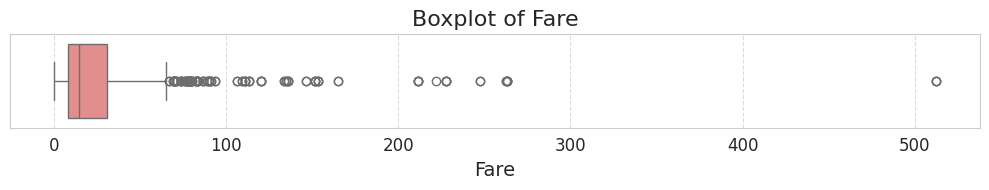

**Observation for 'Fare':**
- The distribution is positively skewed (right-skewed).
- The boxplot indicates the presence of 116 potential outliers.




In [3]:
print("\n### 2. Visualizing Distributions with Histograms and Boxplots ###\n")

# Identify numeric columns for plotting, excluding identifiers like 'PassengerId'
numeric_cols_for_eda = df.select_dtypes(include=np.number).columns.tolist()
if 'PassengerId' in numeric_cols_for_eda:
    numeric_cols_for_eda.remove('PassengerId') # Remove ID column as it's not a true 'feature'

if not numeric_cols_for_eda:
    print("No relevant numeric columns identified for plotting histograms and boxplots.")
else:
    for col in numeric_cols_for_eda:
        print(f"\n--- Visualizing Distribution for: '{col}' ---\n")

        # Create a figure for the histogram
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Histogram of {col} Distribution', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()

        # Create a figure for the boxplot
        plt.figure(figsize=(10, 2)) # Boxplots can be narrower
        sns.boxplot(x=df[col].dropna(), color='lightcoral')
        plt.title(f'Boxplot of {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print(f"**Observation for '{col}':**")
        if df[col].skew() > 0.5:
            print(f"- The distribution is positively skewed (right-skewed).")
        elif df[col].skew() < -0.5:
            print(f"- The distribution is negatively skewed (left-skewed).")
        else:
            print(f"- The distribution appears relatively symmetric.")

        outliers_count = df[df[col] < df[col].quantile(0.25) - 1.5*df[col].quantile(0.75)-df[col].quantile(0.25)] | (df[col] > df[col].quantile(0.75) + 1.5*df[col].quantile(0.75)-df[col].quantile(0.25))
        if df[col].dropna().count() > 0: # Ensure there's data before checking outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            potential_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
            if potential_outliers > 0:
                print(f"- The boxplot indicates the presence of {potential_outliers} potential outliers.")
            else:
                print(f"- No significant outliers detected by the boxplot (using 1.5*IQR rule).")

        print("\n" + "="*70 + "\n") # Separator for clarity

### Hint 3: Analyzing Feature Relationships with Correlation Matrix and Pairplots

**Theoretical Foundation:**
Understanding how variables interact with each other is paramount for feature selection, engineering, and model building.

* **Correlation Matrix (with Heatmap):**
    * **Purpose:** To quantify the linear relationship between all pairs of numeric variables in a dataset. Pearson's correlation coefficient, commonly used, ranges from -1 to +1.
    * **Interpretation:**
        * `+1`: Perfect positive linear correlation (variables move in the same direction).
        * `-1`: Perfect negative linear correlation (variables move in opposite directions).
        * `0`: No linear correlation.
    * **Visualization (Heatmap):** A heatmap visually represents the correlation matrix, using a color gradient to quickly highlight strong positive or negative correlations, and potential multicollinearity (high correlation between independent variables).

* **Pairplot (Scatter Plot Matrix):**
    * **Purpose:** To create a grid of scatter plots for every pair of numerical features, providing a quick visual assessment of pairwise relationships. The diagonal often displays the distribution of each individual variable (e.g., histogram or KDE plot).
    * **Insights:** Excellent for identifying linear and non-linear relationships, clusters, and overall data patterns across multiple variables simultaneously. It helps in spotting potential interactions or redundancies.


### 3. Analyzing Feature Relationships (Correlation Matrix / Pairplot) ###

A. Generating Correlation Matrix:

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


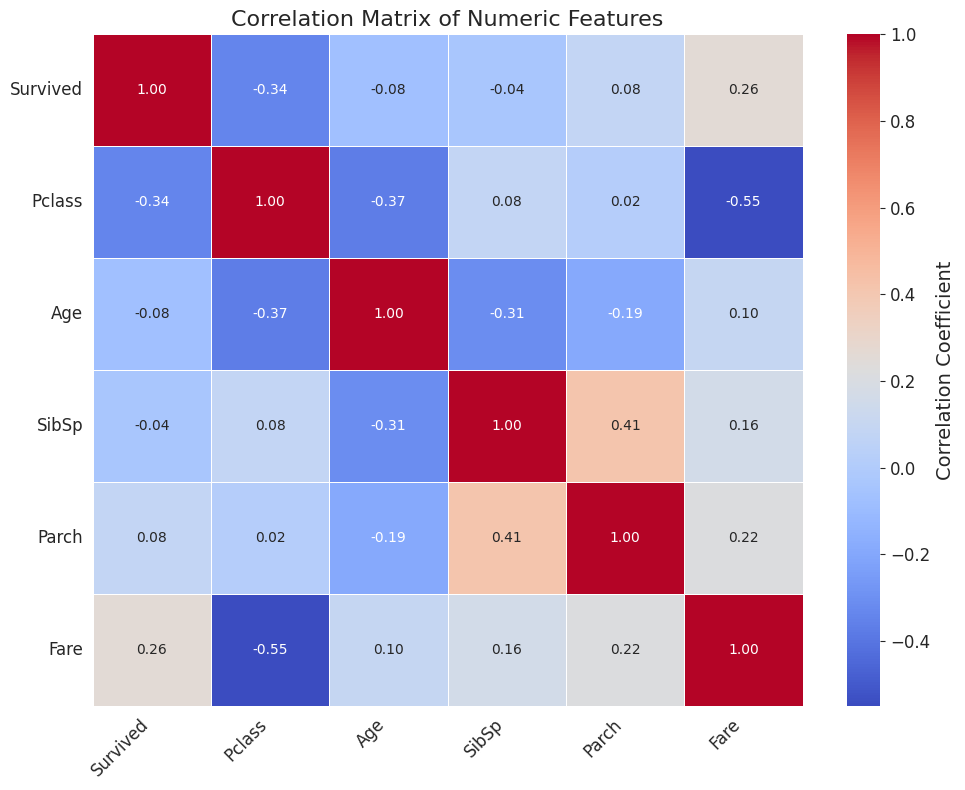


**Interpretation:** A heatmap visually highlights strong positive (closer to +1, e.g., red) or negative (closer to -1, e.g., blue) linear relationships. Look for high absolute values to identify potential multicollinearity or strong predictive features (e.g., 'Fare' and 'Pclass').

B. Generating Pairplot (Scatter Plot Matrix - may take time for large datasets):



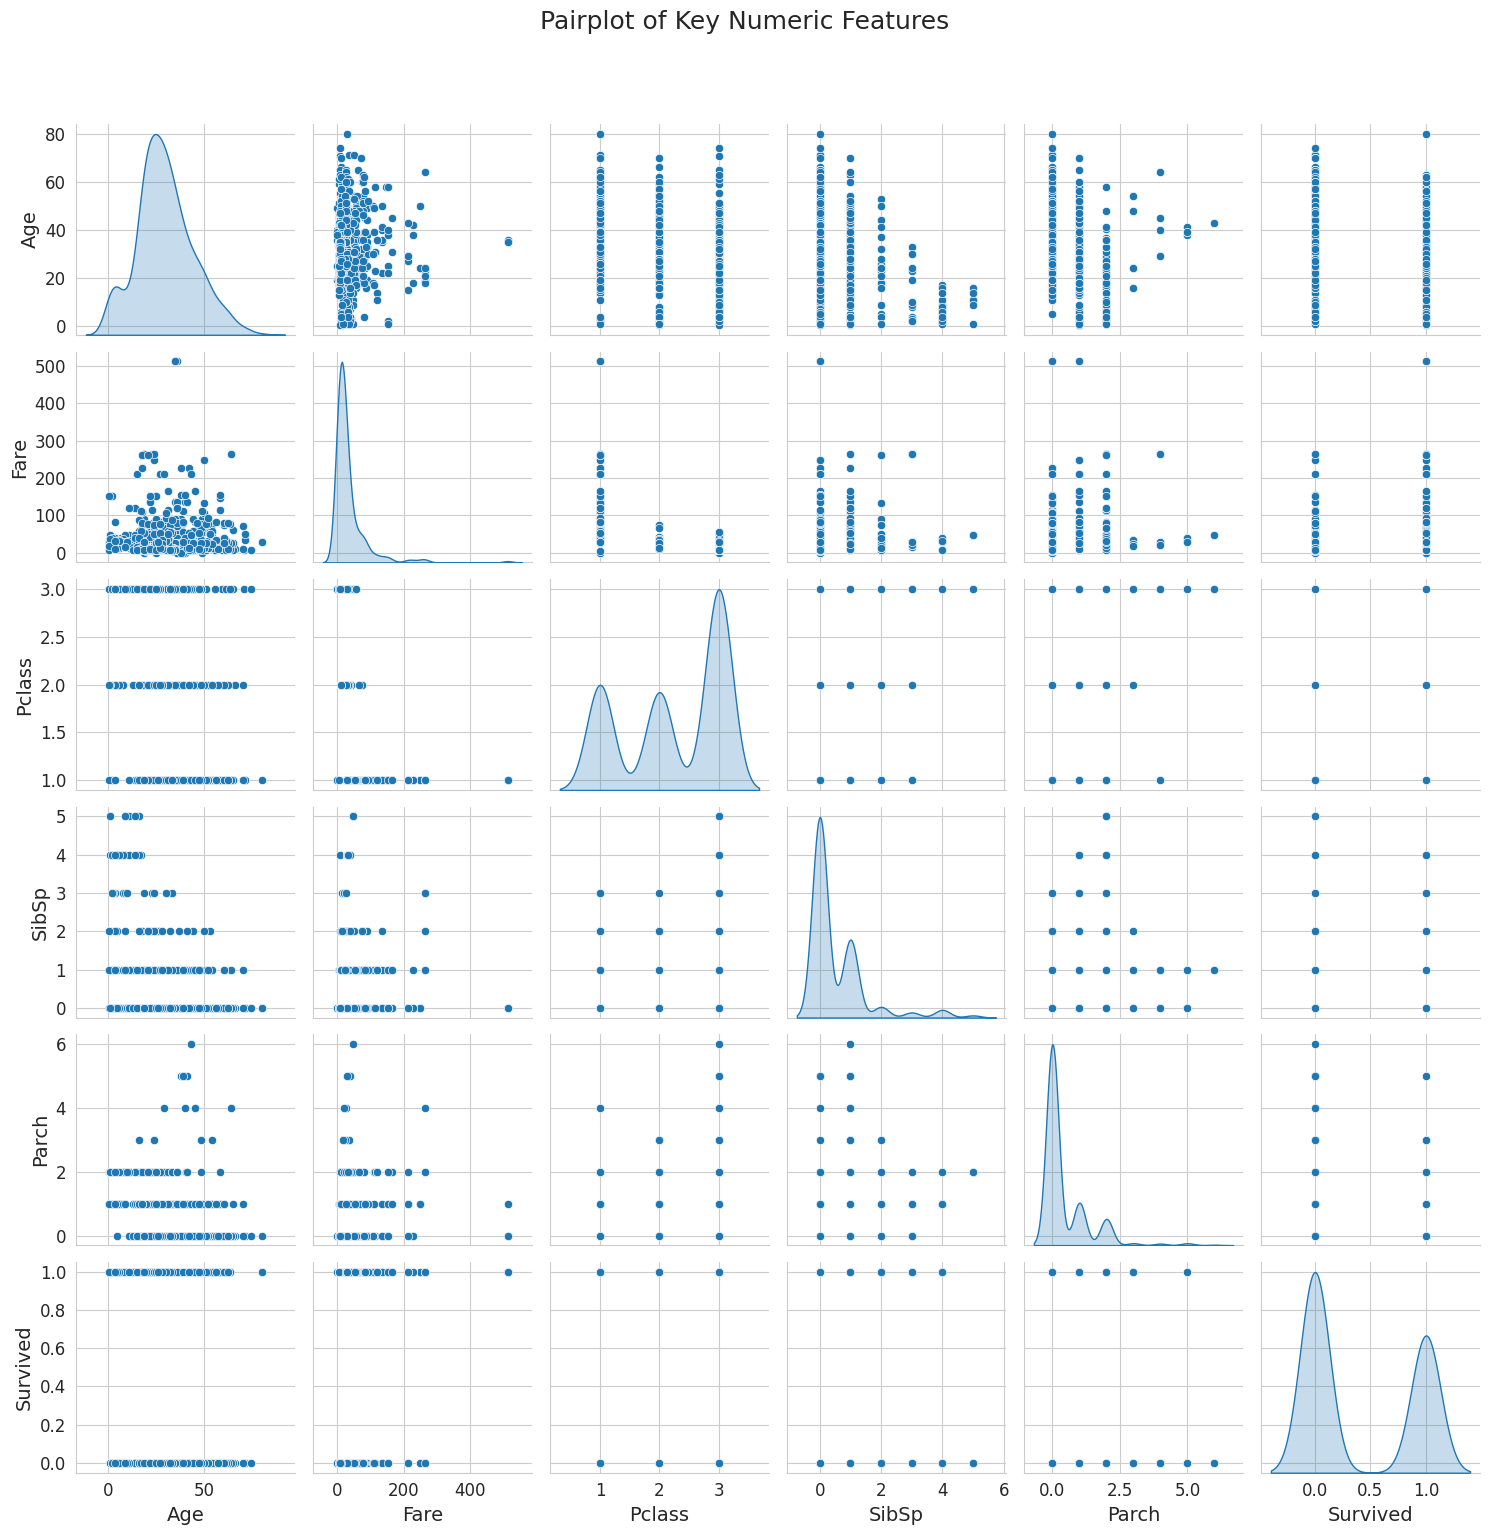


C. Generating Interactive Scatter Matrix (Plotly Express):




**Interpretation:** The interactive scatter matrix allows for detailed examination of pairwise relationships, revealing potential linear or non-linear trends, and data point clustering.




In [4]:
print("\n### 3. Analyzing Feature Relationships (Correlation Matrix / Pairplot) ###\n")

# Filter for numeric columns for correlation analysis (excluding identifiers)
numeric_for_corr_analysis = df.select_dtypes(include=np.number).columns.tolist()
if 'PassengerId' in numeric_for_corr_analysis:
    numeric_for_corr_analysis.remove('PassengerId')

if len(numeric_for_corr_analysis) >= 2:
    print("A. Generating Correlation Matrix:\n")
    # Calculate the Pearson correlation matrix
    correlation_matrix = df[numeric_for_corr_analysis].corr()
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix of Numeric Features', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\n**Interpretation:** A heatmap visually highlights strong positive (closer to +1, e.g., red) or negative (closer to -1, e.g., blue) linear relationships. Look for high absolute values to identify potential multicollinearity or strong predictive features (e.g., 'Fare' and 'Pclass').")

    print("\nB. Generating Pairplot (Scatter Plot Matrix - may take time for large datasets):\n")
    # For pairplot, selecting a subset of relevant numeric columns for clarity and performance
    # Example: 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived' are commonly explored in Titanic EDA
    relevant_pairplot_cols = [col for col in ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived'] if col in df.columns]

    if len(relevant_pairplot_cols) > 1:
        # Use Seaborn's pairplot for static visualization
        # Dropping NaNs for pairplot ensures clean visualization
        sns.pairplot(df[relevant_pairplot_cols].dropna(), diag_kind='kde') # 'kde' shows density estimate on diagonal
        plt.suptitle('Pairplot of Key Numeric Features', y=1.02, fontsize=18) # Adjust title position
        plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
        plt.show()

        # Optional: Use Plotly for interactive scatter matrix
        try:
            print("\nC. Generating Interactive Scatter Matrix (Plotly Express):\n")
            # This provides interactive exploration capabilities
            fig = px.scatter_matrix(df.dropna(subset=relevant_pairplot_cols), dimensions=relevant_pairplot_cols,
                                    title="Interactive Scatter Matrix of Key Numeric Features", height=800)
            fig.update_layout(
                hovermode='closest',
                xaxis_showgrid=True, yaxis_showgrid=True,
                xaxis_zeroline=False, yaxis_zeroline=False
            )
            fig.show()
            print("\n**Interpretation:** The interactive scatter matrix allows for detailed examination of pairwise relationships, revealing potential linear or non-linear trends, and data point clustering.")
        except Exception as e:
            print(f"Could not generate Plotly interactive scatter matrix: {e}")
            print("This might occur due to environment configuration or specific Plotly version issues.")

    else:
        print("Not enough relevant numeric columns (at least 2) for effective pairplot generation.")

else:
    print("Not enough numeric columns (at least 2, excluding 'PassengerId') to perform correlation analysis or pairplot effectively.")

print("\n" + "="*70 + "\n")

### Hint 4: Identifying Patterns, Trends, and Anomalies

**Theoretical Foundation:**
This stage of EDA transcends mere visualization and statistics; it demands critical analytical thinking and often domain expertise. The goal is to synthesize the insights from previous steps to uncover significant characteristics within the data.

* **Patterns:** Regularities or consistent behaviors observed across features. For example, a consistent decline in a metric over time, or a particular relationship between two variables that holds true across many data points.
* **Trends:** Long-term movements or directions in the data, often observed over time or across ordered categories. For example, increasing average 'Fare' over different 'Pclass' values.
* **Anomalies:** Data points that deviate significantly from the general pattern or expected behavior. These can be:
    * **Outliers:** Extreme values in a distribution, which might be data entry errors or genuinely rare but important events.
    * **Missing Data:** Gaps in observations, which need to be understood in terms of their extent, type (e.g., Missing At Random, Missing Not At Random), and potential impact on analysis.
    * **Inconsistencies:** Data that violates business rules or logical constraints (e.g., negative age, non-standard categorical values).

Identifying these elements is crucial for informing data cleaning strategies, feature engineering decisions, and ensuring the robustness of subsequent modeling.


### 4. Identifying Patterns, Trends, and Anomalies ###

A. Analysis of Missing Values:

Columns with Missing Values:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467

**Interpretation:** Missing values, particularly in 'Cabin' and 'Age', are significant. 'Cabin' might be dropped or imputed based on domain knowledge. 'Age' will likely require imputation (e.g., using mean, median, or more sophisticated methods) or careful handling.

B. Analysis of Categorical Feature Distributions (Value Counts):


--- Value Counts for 'Name' ---

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                               

<ipython-input-5-3f6ee5269cbe>:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




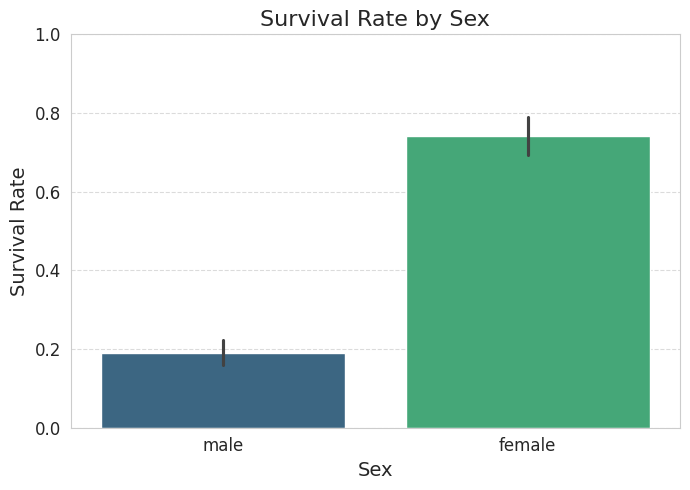


**Observation:** A significantly higher proportion of female passengers survived compared to male passengers. This strongly suggests 'Sex' is a crucial predictor of survival.


<ipython-input-5-3f6ee5269cbe>:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




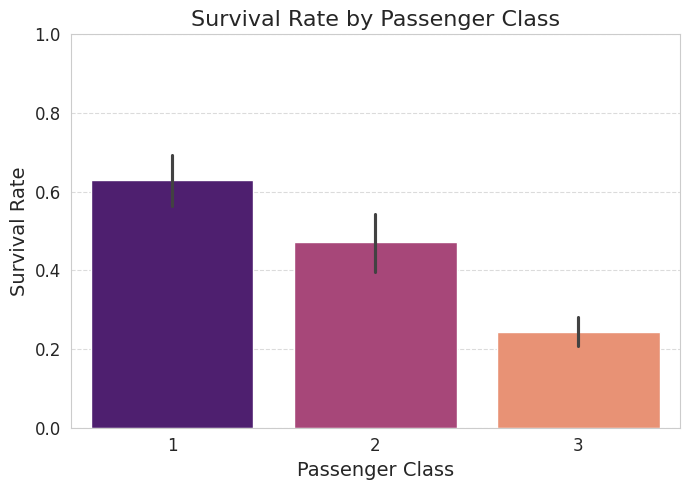


**Observation:** Survival rates tend to decrease significantly with increasing passenger class (i.e., Pclass 1 > Pclass 2 > Pclass 3). This indicates a strong correlation between socio-economic status (represented by Pclass) and survival.

**General Approach:** Identifying patterns, trends, and anomalies requires a combination of statistical insights, visualizations, and domain expertise. It's an iterative process of questioning the data and forming hypotheses.




In [5]:
print("\n### 4. Identifying Patterns, Trends, and Anomalies ###\n")

print("A. Analysis of Missing Values:\n")
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Display columns with any missing values
missing_info_filtered = missing_info[missing_info['Missing Count'] > 0]
if missing_info_filtered.empty:
    print("No missing values detected across the dataset.")
else:
    print("Columns with Missing Values:")
    print(missing_info_filtered)
    print("\n**Interpretation:** Missing values, particularly in 'Cabin' and 'Age', are significant. 'Cabin' might be dropped or imputed based on domain knowledge. 'Age' will likely require imputation (e.g., using mean, median, or more sophisticated methods) or careful handling.")

print("\nB. Analysis of Categorical Feature Distributions (Value Counts):\n")
# Analyze value counts for non-numeric (object/category) columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if not categorical_cols:
    print("No categorical columns found for value count analysis.")
else:
    for col in categorical_cols:
        print(f"\n--- Value Counts for '{col}' ---\n")
        # Display value counts, including potential NaN values
        print(df[col].value_counts(dropna=False))
        # Display normalized value counts for quick percentage view
        print(df[col].value_counts(normalize=True, dropna=False).mul(100).round(2).astype(str) + '%')
        print("-" * 50)
    print("\n**Interpretation:** Value counts help identify the most frequent categories, rare categories, and potential data entry inconsistencies or unique values (e.g., 'Name' and 'Ticket' are unique identifiers). For 'Embarked', the distribution across ports is visible, and any missing values are also counted.")

print("\nC. Illustrative Pattern: Survival Rate by Gender and Class (requires domain knowledge):\n")

# Pattern: Survival based on 'Sex'
if 'Survived' in df.columns and 'Sex' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
    plt.title('Survival Rate by Sex', fontsize=16)
    plt.xlabel('Sex', fontsize=14)
    plt.ylabel('Survival Rate', fontsize=14)
    plt.ylim(0, 1) # Survival rate is between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n**Observation:** A significantly higher proportion of female passengers survived compared to male passengers. This strongly suggests 'Sex' is a crucial predictor of survival.")

# Pattern: Survival based on 'Pclass'
if 'Survived' in df.columns and 'Pclass' in df.columns:
    plt.figure(figsize=(7, 5))
    sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')
    plt.title('Survival Rate by Passenger Class', fontsize=16)
    plt.xlabel('Passenger Class', fontsize=14)
    plt.ylabel('Survival Rate', fontsize=14)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("\n**Observation:** Survival rates tend to decrease significantly with increasing passenger class (i.e., Pclass 1 > Pclass 2 > Pclass 3). This indicates a strong correlation between socio-economic status (represented by Pclass) and survival.")

print("\n**General Approach:** Identifying patterns, trends, and anomalies requires a combination of statistical insights, visualizations, and domain expertise. It's an iterative process of questioning the data and forming hypotheses.")
print("\n" + "="*70 + "\n")

### Hint 5: Formulating Feature-Level Inferences from Visuals

**Theoretical Foundation:**
The culmination of EDA involves synthesizing all observations into concise, actionable inferences about individual features and their interrelationships. These inferences are not definitive conclusions but serve as informed hypotheses that guide subsequent data processing (e.g., feature engineering, imputation strategies) and model selection. They also help in communicating initial findings to stakeholders.

**Key Inferences Derived from Titanic Dataset EDA:**

* **`Age`:** The 'Age' distribution often exhibits a right-skew, with a higher concentration of younger passengers. The presence of significant missing values (as seen from `df.info()` and `isnull().sum()`) necessitates imputation strategies (e.g., median, mean, or more sophisticated methods like regression imputation) to preserve data integrity for modeling. Outliers are also visible, potentially representing very young children or elderly individuals.
* **`Fare`:** This feature is highly positively skewed, with a majority of passengers paying lower fares and a few paying exceptionally high fares (visible as pronounced outliers in boxplots). A logarithmic transformation might be beneficial for normalization if using models sensitive to skewed distributions.
* **`Sex`:** A profoundly impactful categorical feature. Visualizations (e.g., bar plots of survival rate by gender) consistently demonstrate that females had a significantly higher survival rate than males, highlighting its importance as a predictor.
* **`Pclass` (Passenger Class):** A strong categorical feature inversely correlated with survival. First-class passengers generally exhibited higher survival rates compared to second and third-class passengers, suggesting a social hierarchy or advantageous positioning influenced survival outcomes.
* **`SibSp` and `Parch` (Family Size):** These features, often combined to represent family size, can reveal patterns where individuals traveling alone or in very large groups had lower survival rates compared to those in small to medium-sized families. This suggests that family context might play a role in survival.
* **`Cabin`:** Characterized by a substantial proportion of missing values. This suggests that the feature might either need to be largely dropped due to data sparsity or requires highly strategic imputation if its information is deemed critical.
* **`Embarked` (Port of Embarkation):** A categorical feature with a dominant category (Southampton 'S') and fewer missing values. Its relationship with survival might be indirect, often mediated by 'Pclass' (as certain classes boarded from specific ports).

These inferences lay the groundwork for informed decisions during the subsequent phases of the data science pipeline.

## Section 3: Professional Learning Outcomes

Successfully completing this Exploratory Data Analysis task provides a robust foundation in critical data science competencies:

* **Proficiency in Data Visualization:** Mastering the art of selecting and generating appropriate statistical plots (histograms, boxplots, heatmaps, pairplots) to effectively communicate data characteristics and relationships.
* **Expertise in Descriptive Statistics:** Gaining a comprehensive understanding of how to compute, interpret, and leverage fundamental statistical measures to summarize and understand data distributions.
* **Enhanced Pattern and Anomaly Detection:** Developing a keen analytical eye for identifying underlying data patterns, emerging trends, and critical anomalies (such as outliers and missing data) that impact data quality and model performance.
* **Skill in Formulating Data-Driven Hypotheses:** Learning to translate observations from EDA into testable hypotheses and preliminary inferences, guiding subsequent analytical steps and informing strategic decisions.
* **Foundational Data Preprocessing Insight:** Understanding the immediate implications of EDA findings on data cleaning, feature engineering, and the overall data preparation phase for machine learning pipelines.

This structured EDA approach is a cornerstone skill for any data professional, enabling the extraction of meaningful insights and informed decision-making from raw data.